<a href="https://colab.research.google.com/github/chizuchizu/IOAI/blob/main/Task1/chizu_006_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Save the Factory: Feature Engineering Challenge

<img src="https://drive.google.com/uc?id=1QjV8Th9fOK89MhgV-Y1Irn7dTl7ZheP0" width="650">

## Background

In the whimsical town of Widgetville, the mighty Widget Corp stands as the centerpiece, crafting widgets of unmatched quality with a **Ruby** and **Sapphire** magic stones inside. But recently, a trickster sprite seems to have infiltrated the assembly lines, introducing problems and faults to widgets's working procedure and labels. As the company’s freshly appointed Chief Engineering Detective, you are tasked with a mission to unravel this puzzling situation.

## Task

- Your ultimate goal is to effectively classify widgets into two classes: **Ruby** and **Sapphire**.

- You have recovered the labels for a previous month's supply of widgets, and should use these to classify the remaining widgets.

- For every widget, you have an access to the so-called "The Pulse of the Machine" -- a unique numerical representation of each widget, which features 8 magic threads (represented by 178 numbers) woven into the central timeless crystal.
Therefore, each widget is described by (178 x 8) array. You must use these data to recover the **Ruby** and **Sapphire** labels.

- You need to engineer discerning features from the **Pulse of the Machine**, since efficient factory procedures allow you to **only use Decision Tree Classifier** with a limited tree depth as a model, with no hyperparameters change allowed.
  - You can read more about Decision Trees in scikit-learn documentation:
    - https://en.wikipedia.org/wiki/Decision_tree
    - https://scikit-learn.org/stable/modules/tree.html
    - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
  
- You have two levels of difficulty, producing **Efficient** and **Super Duper Efficient** solutions. These vary by the allowed tree depth.

- Your classification success will be measured by the ROC AUC metric
  - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

- Your solution for each task should not exceed 3 minutes for training from scratch and 1 minute for inference on the test set on the standard Colab non-GPU instance. This includes features generation.

## Deliverables

- We will share the test data 48 hours before the deadline

- Use test data to create `efficient_test_predictions.txt` and `super_duper_efficient_test_predictions.txt` and share these files with us

- Also share this notebook containing your solution so we can reproduce your results and check the time constraints

## Tips
- Aim to create a minimal yet mighty set of derivative features to maintain the elegance and effectiveness of your tools.
- The crystals are indeed **timeless** -- be aware that there are no time series involved.
- There was a rumor that not only labels, but the data itself was corrupted by evil spirits. Is there a way for a possible recovery?
- Ensure your solutions are as clear as the crystal waters of Widgetville’s famed springs by providing them with sufficient documentation.

# Below goes data loading and visualization

In [1]:
import pandas as pd
import numpy as np
np.random.seed(2024)
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

import scipy.stats


In [6]:
!gdown 1eIrRyAqckN6zCjPb9VS-2rw7Bup7YhsA

Downloading...
From (original): https://drive.google.com/uc?id=1eIrRyAqckN6zCjPb9VS-2rw7Bup7YhsA
From (redirected): https://drive.google.com/uc?id=1eIrRyAqckN6zCjPb9VS-2rw7Bup7YhsA&confirm=t&uuid=2f37cf57-4832-4509-8126-e45e531fae43
To: /content/FE_hometask_data_v3.pickle
100% 260M/260M [00:03<00:00, 74.1MB/s]


In [3]:
data = pd.read_pickle('FE_hometask_data_v3.pickle')
for key in data.keys():
  print(key)

train
val


In [13]:
X_train = np.array([x[0] for x in data['train'].values()])
y_train = np.array([x[1] for x in data['train'].values()])

X_val = np.array([x[0] for x in data['val'].values()])
y_val = np.array([x[1] for x in data['val'].values()])


# this is temporary as we'll share the test data later
X_test = X_val

In [15]:
from scipy.fft import fft, fftfreq
Fs = X_train.shape[1]  # サンプル/秒
# サンプル数
T = 1.0 / Fs  # サンプリング間隔
N = X_train.shape[1]  # サンプル数
t = np.linspace(0.0, N*T, N, endpoint=False)

In [27]:
# FFTの計算
yf = fft(X_train)
xf = fftfreq(N, T)[:N//2]

In [28]:
yf.shape, xf.shape

((20240, 187, 8), (93,))

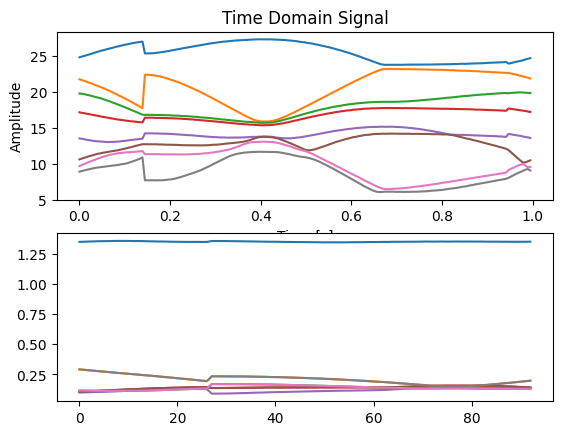

In [24]:
# オリジナルの波形をプロット
plt.subplot(2, 1, 1)
plt.plot(t, X_train[0])
plt.title('Time Domain Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# FFT結果のプロット
plt.subplot(2, 1, 2)
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))

In [9]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape

((20240, 187, 8), (20240,), (1456, 187, 8), (1456,), (1456, 187, 8))

In [10]:
def vis(arr, color='r'):
  widget_type = 'Ruby' if color == 'r' else 'Sapphire'
  plt.figure(figsize=(12, 8))
  for cnt in range(8):
    plt.plot(arr[:, cnt], color=color, alpha=.2 + .1*cnt)
  plt.grid()
  plt.title(f'Pulse of the Machine for {widget_type}')

In [ ]:
y_train[0], y_train[2]

(True, False)

# Functions to evaluate the results
N.B. Do not change it!

In [5]:
def efficient_eval(train_features, val_features):
  model = DecisionTreeClassifier(max_depth=20, random_state=2024).fit(train_features, y_train)
  preds = model.predict(val_features)
  return roc_auc_score(y_val, preds)

def super_duper_efficient_eval(train_features, val_features):
  model = DecisionTreeClassifier(max_depth=4, random_state=2024).fit(train_features, y_train)
  preds = model.predict(val_features)
  return roc_auc_score(y_val, preds)

# Functions to write answers to files

Don't change the functions, share the files with us in your final submission.

In [6]:
def efficient_test_predictions(train_features, test_features):
  model = DecisionTreeClassifier(max_depth=20, random_state=2024).fit(train_features, y_train)
  preds = ['1' if x else '0'
           for x in model.predict(test_features)]
  with open('efficient_test_predictions.txt', 'w') as f:
    f.write(''.join(preds))

def super_duper_efficient_test_predictions(train_features, test_features):
  model = DecisionTreeClassifier(max_depth=4, random_state=2024).fit(train_features, y_train)
  preds = ['1' if x else '0'
           for x in model.predict(test_features)]
  with open('super_duper_efficient_test_predictions.txt', 'w') as f:
    f.write(''.join(preds))

# Baselines: let's try some simple feature sets!
- every 10th element of a flattened array
- mean value / standard deviation by each axis

In [7]:
def both_evavluate(train,val):
    %time print(f"efficient eval score : {efficient_eval(train,val)}")
    %time print(f"super duper efficient eval score : {super_duper_efficient_eval(train,val)}")

In [8]:
def min_max_normalization(a,axis=None):
    a_min, a_max = a.min(axis=axis, keepdims=True), a.max(axis=axis, keepdims=True)
    return (a-a_min)/(a_max-a_min)

In [9]:
def extract_important_index(a):
    return np.array([
        a[138][0], a[178][0], a[105][0], a[108][0], a[132][0], a[131][0], a[177][0], a[155][0], a[115][0], a[0][0],
        a[169][1], a[7][1], a[14][1], a[20][1], a[72][1], a[51][1], a[13][1], a[118][1], a[40][1], a[160][1],
        a[116][2], a[83][2], a[128][2], a[152][2], a[111][2], a[133][2], a[40][2], a[16][2], a[104][2], a[80][2],
        a[131][3], a[120][3], a[22][3], a[40][3], a[171][3], a[157][3], a[107][3], a[59][3], a[133][3], a[134][3],
        a[155][4], a[139][4], a[94][4], a[170][4], a[18][4], a[3][4], a[169][4], a[122][4], a[148][4], a[25][4],
        a[33][5], a[34][5], a[159][5], a[62][5], a[52][5], a[126][5], a[70][5], a[42][5], a[37][5], a[162][5],
        a[33][6], a[32][6], a[154][6], a[4][6], a[63][6], a[158][6], a[182][6], a[150][6], a[29][6], a[94][6],
        a[6][7], a[24][7], a[183][7], a[102][7], a[70][7], a[30][7], a[50][7], a[31][7], a[158][7], a[16][7],
    ])

In [28]:
def using_important_index_each_wave(X):
    # Y = np.array([extract_important_index(x) for x in X])
    # print(Y.shape)
    Y = np.apply_along_axis(min_max_normalization, 1, X)
    yf = np.abs(fft(Y))

    Y = np.concatenate([Y, yf], axis=1)

    # print(Y.shape)
    return yf.reshape((yf.shape[0], -1))

In [25]:
a = using_important_index_each_wave(X_train)

In [26]:
a.shape

(20240, 2992)

In [11]:
# np.abs(yf)

In [27]:
both_evavluate(using_important_index_each_wave(X_train),using_important_index_each_wave(X_val))

efficient eval score : 0.830132933666042
CPU times: user 2min 34s, sys: 193 ms, total: 2min 35s
Wall time: 2min 37s
super duper efficient eval score : 0.7881121778024421
CPU times: user 41.7 s, sys: 100 ms, total: 41.8 s
Wall time: 46.4 s


In [29]:
both_evavluate(using_important_index_each_wave(X_train),using_important_index_each_wave(X_val))

efficient eval score : 0.8155401272864766
CPU times: user 1min 14s, sys: 124 ms, total: 1min 14s
Wall time: 1min 15s
super duper efficient eval score : 0.6987116982798544
CPU times: user 20.8 s, sys: 75.6 ms, total: 20.9 s
Wall time: 20.9 s


In [ ]:
def feature_flatten(X):
    X = X.reshape((X.shape[0], -1))
    Y = np.apply_along_axis(min_max_normalization, 1, X)
    Y = np.array(Y)
    return Y

In [ ]:
# print(f"wave {i} auc score : {super_duper_efficient_eval(feature_flatten(X_train),feature_flatten(X_val))}")
# model = DecisionTreeClassifier(max_depth=4, random_state=2024).fit(feature_flatten(X_train),y_train)
# feature_importances = model.feature_importances_
# sorted_index = np.argsort(feature_importances)[::-1]
# for i in range(10):
#     print(f"wave : {sorted_index[i]//187}, index ; {sorted_index[i]%187}, importance :  {feature_importances[sorted_index[i]]}")
# plt.figure(figsize=(15, 10))
# plt.bar(range(len(feature_importances)), feature_importances)

In [ ]:
def get_diff_axis_zero(X):
    Y=[]
    for i in range(len(X)):
        #todo 2-1 (0-indexed)
        tmp = np.ravel(np.diff(X[i], axis=0))
        tmp = min_max_normalization(tmp)
        Y.append(list(tmp))

    Y = np.array(Y)
    return Y

In [ ]:
%%time
# both_evavluate(get_diff_axis_zero(X_train),get_diff_axis_zero(X_val))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs
